#                                                    Liver Cirrhosis Stage Detection

#### Problem Statement : Build a system that can output the level of liver damage (liver cirrhosis) given patient data

#### Preparing tools

In [174]:
#EDA for data
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
# model for use 
from sklearn.ensemble import RandomForestClassifier
# for data preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# for Model evaluation 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix


In [8]:
# importing Dataset
df = pd.read_csv("liver_cirrhosis.csv")
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [12]:
# checking null value 
df.isna().sum()  # no missing- null value 

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [14]:
# Data - preprocessing
#object cols : Drug Sex  Ascites  Hepatomegaly Spiders Edema  Status
df.Drug.value_counts()

Drug
Placebo            15827
D-penicillamine     9173
Name: count, dtype: int64

In [16]:
df.Sex.value_counts()

Sex
F    22137
M     2863
Name: count, dtype: int64

In [18]:
df.Ascites.value_counts()

Ascites
N    16798
Y     8202
Name: count, dtype: int64

In [20]:
df.Hepatomegaly.value_counts()

Hepatomegaly
N    15243
Y     9757
Name: count, dtype: int64

In [22]:
df.Spiders.value_counts()

Spiders
N    13614
Y    11386
Name: count, dtype: int64

In [24]:
df.Edema.value_counts()

Edema
N    20220
S     3698
Y     1082
Name: count, dtype: int64

In [26]:
df.Status.value_counts()

Status
C     13516
D      9456
CL     2028
Name: count, dtype: int64

In [28]:
le = LabelEncoder()

In [30]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

In [32]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,0,1,18499,0,0,1,0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,0,1,19724,1,1,0,1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,0,1,11839,0,0,0,0,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,2,1,16467,0,0,0,0,0,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,2,1,21699,0,0,1,0,0,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [34]:
df.Edema.value_counts()

Edema
0    20220
1     3698
2     1082
Name: count, dtype: int64

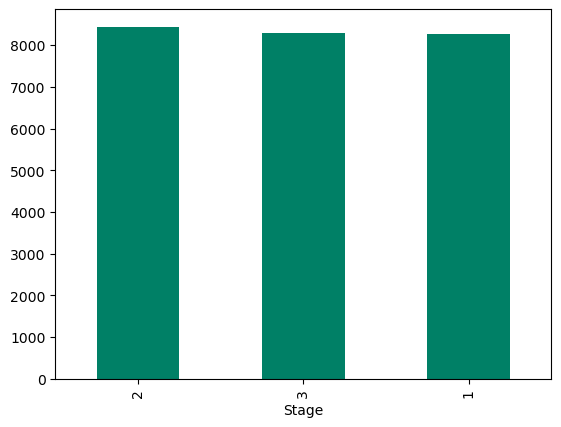

In [36]:
# Data Visualisation 
df.Stage.value_counts().plot(kind="bar",cmap="summer");

In [38]:
pd.crosstab(df.Sex,df.Stage)

Stage,1,2,3
Sex,,,
0,7550,7411,7176
1,715,1030,1118


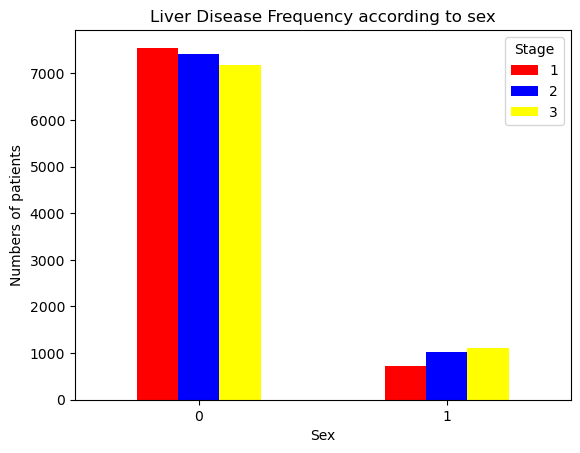

In [40]:
pd.crosstab(df.Sex,df.Stage).plot(kind="bar",color=["red","blue","yellow"])

plt.title("Liver Disease Frequency according to sex")
plt.xlabel("Sex")
plt.ylabel("Numbers of patients")
plt.xticks(rotation=0);

Text(0.5, 1.0, 'Information about Cholestrol and albumin level in diff Stages of disease')

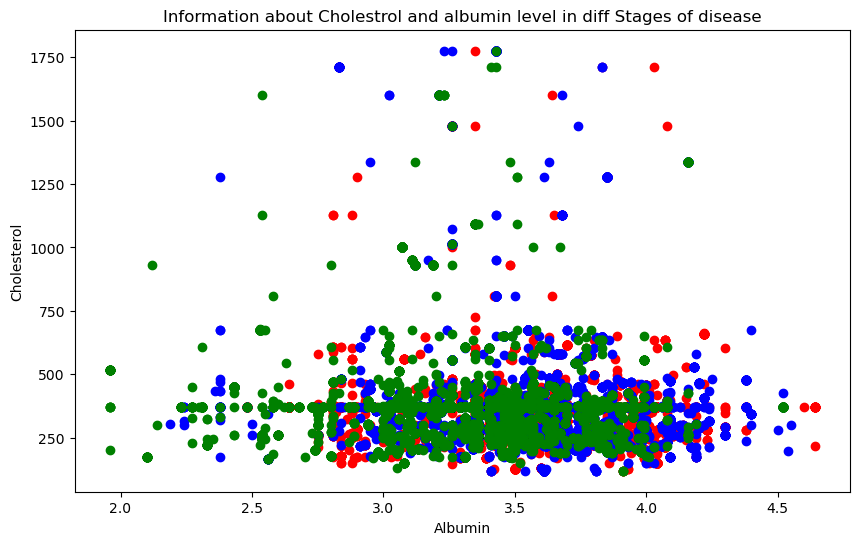

In [42]:
plt.figure(figsize=(10,6))

plt.scatter(df.Albumin[df.Stage==1],
           df.Cholesterol[df.Stage==1],
           c="red")

plt.scatter(df.Albumin[df.Stage==2],
           df.Cholesterol[df.Stage==2],
           c="blue")

plt.scatter(df.Albumin[df.Stage==3],
           df.Cholesterol[df.Stage==3],
           c="green")

plt.xlabel("Albumin")
plt.ylabel("Cholesterol")
plt.title("Information about Cholestrol and albumin level in diff Stages of disease")

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


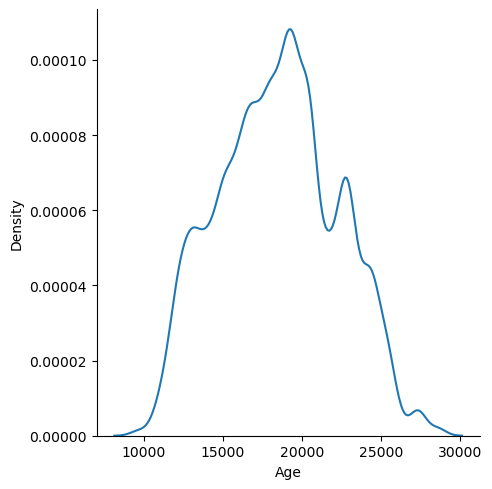

In [44]:
# check distribution 
sns.displot(df.Age,kind="kde"); # agein days

Text(0.5, 1.0, 'Platelets amount in diff stages')

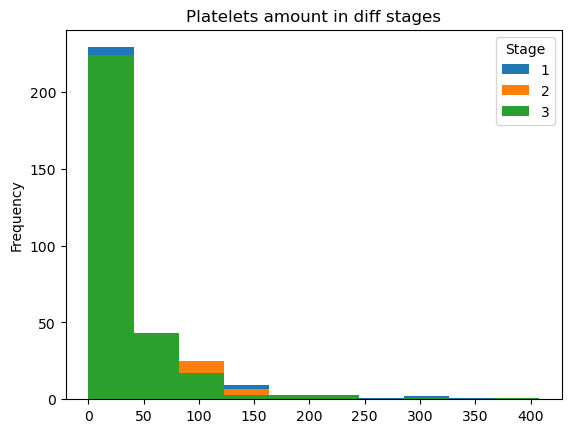

In [46]:
pd.crosstab(df.Platelets,df.Stage).plot(kind="hist");
plt.title("Platelets amount in diff stages")

In [48]:
pd.crosstab(df.Platelets,df.Stage)

Stage,1,2,3
Platelets,,,
62.0,0,0,27
70.0,48,2,1
71.0,0,0,78
73.0,0,0,2
76.0,6,2,48
...,...,...,...
517.0,0,1,40
518.0,1,22,2
539.0,30,1,4


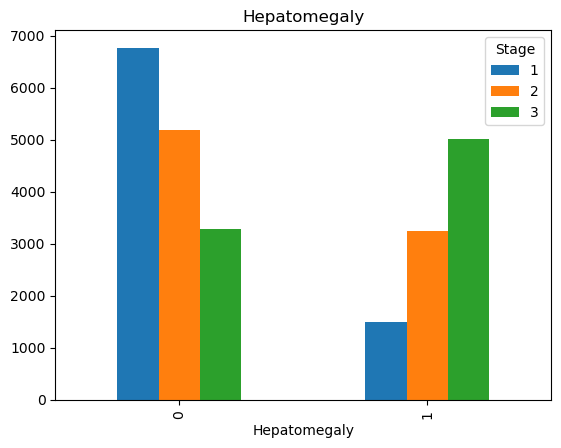

In [50]:
pd.crosstab(df.Hepatomegaly,df.Stage).plot(kind="bar");
plt.title("Hepatomegaly");

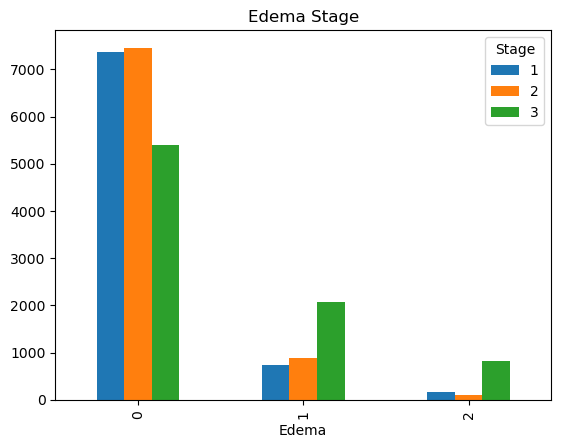

In [52]:
pd.crosstab(df.Edema,df.Stage).plot(kind="bar");
plt.title("Edema Stage");

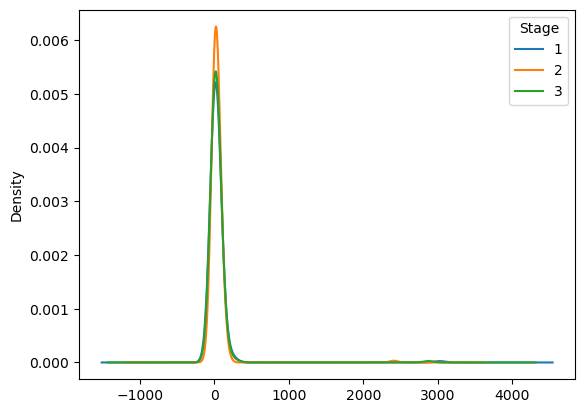

In [54]:
pd.crosstab(df.Cholesterol,df.Stage).plot(kind="kde");

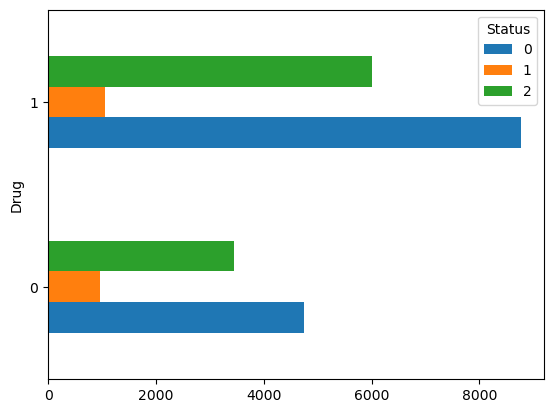

In [56]:
pd.crosstab(df.Drug,df.Status).plot(kind="barh");

In [58]:
df.Alk_Phos

0         598.0
1         663.0
2        1243.0
3        1024.0
4        1052.0
          ...  
24995    9009.8
24996    9009.8
24997     790.0
24998    1637.0
24999    1637.0
Name: Alk_Phos, Length: 25000, dtype: float64

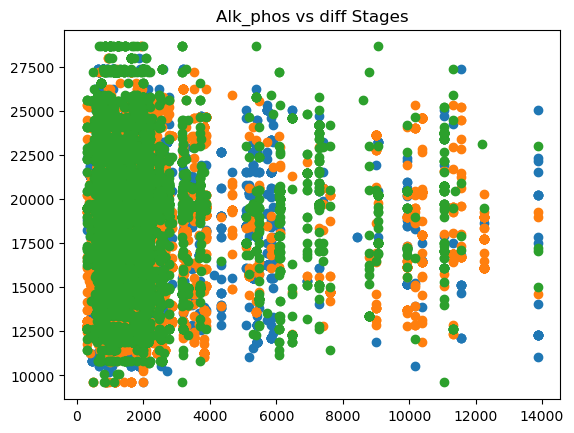

In [60]:
plt.scatter(df.Alk_Phos[df.Stage==1],
           df.Age[df.Stage==1])
plt.scatter(df.Alk_Phos[df.Stage==2],
           df.Age[df.Stage==2])
plt.scatter(df.Alk_Phos[df.Stage==3],
           df.Age[df.Stage==3])

plt.title("Alk_phos vs diff Stages");

In [62]:
df.corr()  # correlation matrix

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.000000,-0.390415,-0.090464,-0.060569,0.002075,-0.150437,-0.200410,-0.190765,-0.321355,-0.394799,-0.123461,0.368851,-0.281349,0.147792,-0.220532,-0.147606,0.115908,-0.149960,-0.309484
Status,-0.390415,1.000000,-0.016577,0.089690,0.041610,0.021463,0.313121,0.038691,0.274164,0.443122,0.150935,-0.259908,0.326777,0.142470,0.267885,0.185182,-0.093708,0.264482,0.275194
Drug,-0.090464,-0.016577,1.000000,-0.005641,-0.070240,0.371468,-0.115855,0.335426,-0.003558,0.046757,0.009986,-0.039801,0.027728,0.005376,0.019675,0.019693,-0.005776,0.025733,0.030862
Age,-0.060569,0.089690,-0.005641,1.000000,0.141418,0.196306,0.053200,0.029368,0.100458,0.006081,-0.035932,-0.108807,0.006670,0.029575,0.011165,0.030719,-0.123611,0.042134,0.165988
Sex,0.002075,0.041610,-0.070240,0.141418,1.000000,-0.028170,0.059129,-0.112474,0.011369,0.001442,-0.010327,0.030589,0.039261,0.026259,-0.000592,0.008854,-0.085006,0.046095,0.061687
Ascites,-0.150437,0.021463,0.371468,0.196306,-0.028170,1.000000,-0.300229,0.636974,0.106499,0.059315,-0.009212,-0.186447,0.023429,-0.021293,0.058335,0.029818,-0.187761,0.116296,0.111012
Hepatomegaly,-0.200410,0.313121,-0.115855,0.053200,0.059129,-0.300229,1.000000,-0.130854,0.228946,0.262475,0.112169,-0.128430,0.150825,0.055129,0.145789,0.131930,-0.124463,0.156886,0.353210
Spiders,-0.190765,0.038691,0.335426,0.029368,-0.112474,0.636974,-0.130854,1.000000,0.116664,0.122363,0.029342,-0.198760,0.102939,-0.002060,0.094804,0.043507,-0.170010,0.195255,0.168049
Edema,-0.321355,0.274164,-0.003558,0.100458,0.011369,0.106499,0.228946,0.116664,1.000000,0.374997,-0.022112,-0.283490,0.206763,0.017813,0.191645,0.114228,-0.129038,0.312881,0.251095
Bilirubin,-0.394799,0.443122,0.046757,0.006081,0.001442,0.059315,0.262475,0.122363,0.374997,1.000000,0.339106,-0.283105,0.432199,0.112972,0.368024,0.379776,-0.095162,0.254145,0.168006


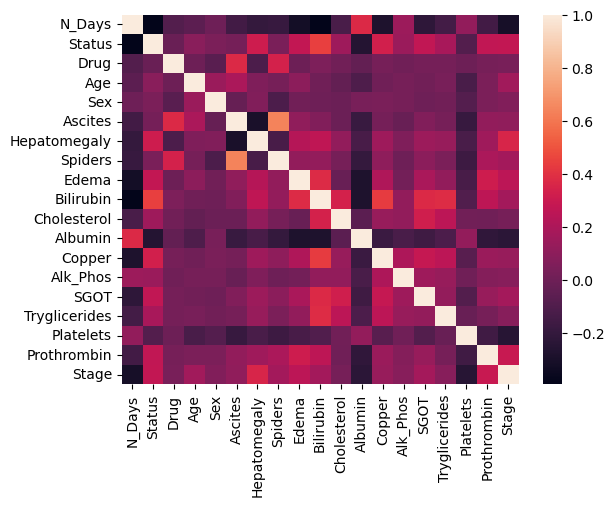

In [64]:
sns.heatmap(df.corr());

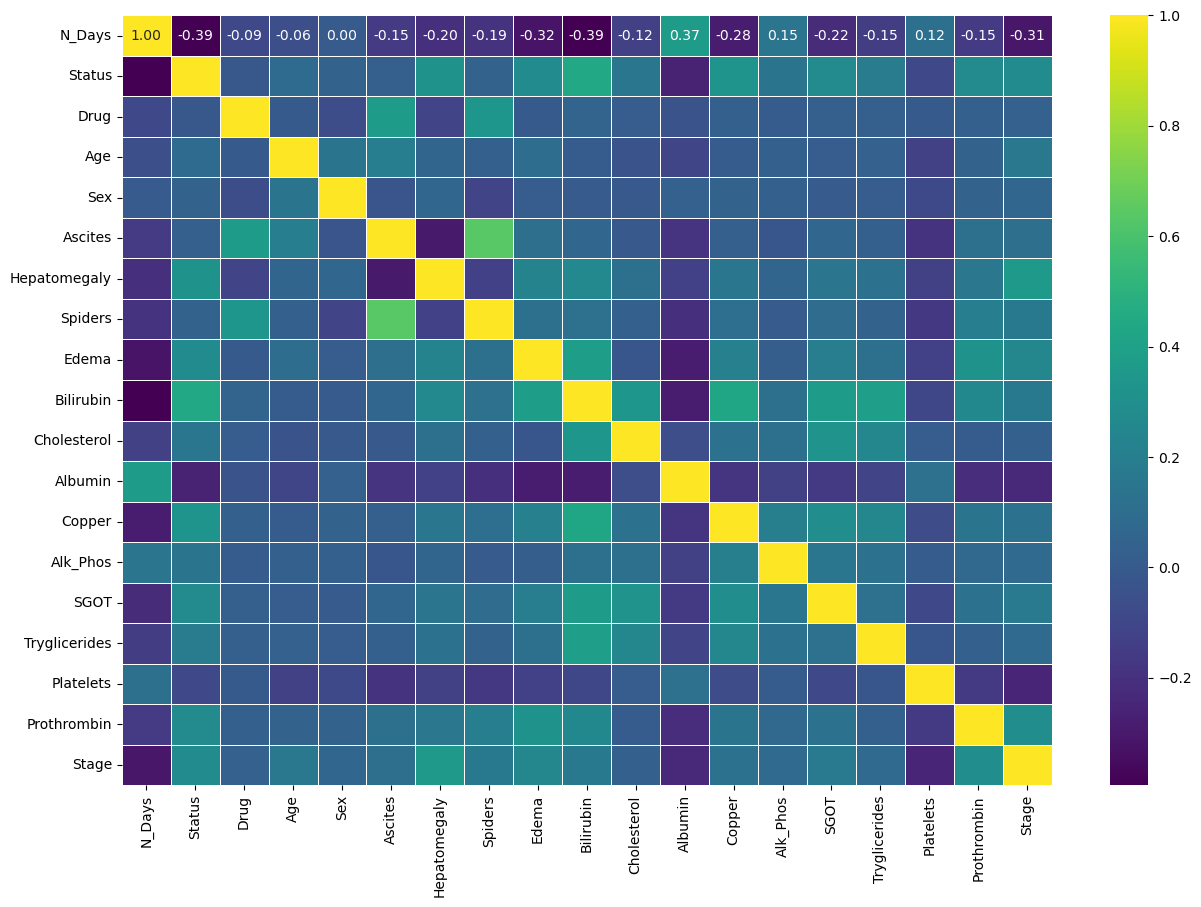

In [66]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="viridis");

###  Data split and modelling 

In [69]:
X = df.drop("Stage",axis=1)
y = df["Stage"]

In [71]:
# split data into train and test sets
np.random.seed(42)
# split into train & test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [73]:
# Model use : RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [74]:
training_Score = model.score(X_train,y_train)

In [77]:
print(f'The Training Score of model is :{training_Score} ')

The Training Score of model is :0.994 


In [79]:
testing_Score = model.score(X_test,y_test)
print(f'The Test Score of model is :{testing_Score}')

The Test Score of model is :0.9552


In [81]:
model.get_params()  # hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Baseline- model 

### Hyper-parameter Tunning

#### RandomisedSearchCV

In [89]:
# hyper-parameters grid
rf_grid = {"n_estimators": np.arange(10,100,50),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [91]:
# setuo random search for hyperparameter
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=5,
                          verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [93]:
rs_rf.score(X_test,y_test)

0.9322

In [97]:
rs_rf.best_params_ # best parameters for our model 

{'n_estimators': 60,
 'min_samples_split': 10,
 'min_samples_leaf': 15,
 'max_depth': None}

In [99]:
print(f"The accuracy score of RandCV RF_Model:{rs_rf.score(X_test,y_test)*100}")

The accuracy score of RandCV RF_Model:93.22


In [104]:
rs_y_preds = rs_rf.predict(X_test)
rs_y_preds

array([1, 1, 3, ..., 3, 1, 3], dtype=int64)

#### Now make ideal model according to hyperparameter tunning

In [112]:
Final_model = RandomForestClassifier(n_estimators=60,
                                    min_samples_leaf=15,
                                    min_samples_split=10,
                                    max_depth=None)

In [114]:
Final_model.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=15, min_samples_split=10,
                       n_estimators=60)

In [116]:
Final_model.score(X_test,y_test)

0.9296

## Predictions

In [119]:
preds = Final_model.predict(X_test)

In [121]:
preds

array([1, 1, 3, ..., 3, 1, 3], dtype=int64)

In [130]:
predictions = pd.DataFrame()
predictions["Agein"] = X_test["Age"]
predictions["Stage"] = preds

## prections of Different Stages vs Agein(Age)

In [218]:
predictions

,Agein,Stage
6868,17167,1
24016,14975,1
9668,18993,3
13640,18972,3
14018,14106,3
...,...,...
8670,17850,2
11839,16300,1
4013,21185,3
21147,21281,1


## prediction Result in terms of Agein age

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


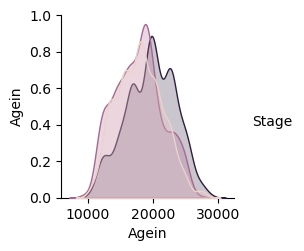

In [162]:
sns.pairplot(predictions,hue="Stage")

In [171]:
predictions  # predictions 

,Agein,Stage
6868,17167,1
24016,14975,1
9668,18993,3
13640,18972,3
14018,14106,3
...,...,...
8670,17850,2
11839,16300,1
4013,21185,3
21147,21281,1


## Now Evaluating Stage detection model 

In [178]:
print(f'Confusion matrix:{confusion_matrix(y_test,preds)}')

Confusion matrix:[[1501  112   44]
 [  61 1579   57]
 [  27   51 1568]]


In [180]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.94      0.91      0.92      1657
           2       0.91      0.93      0.92      1697
           3       0.94      0.95      0.95      1646

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



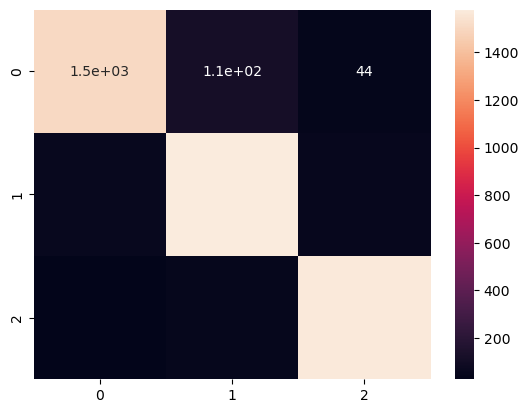

In [191]:
sns.heatmap(confusion_matrix(y_test, preds),annot=True);   # visualization of confusion matrix

## Features importance 

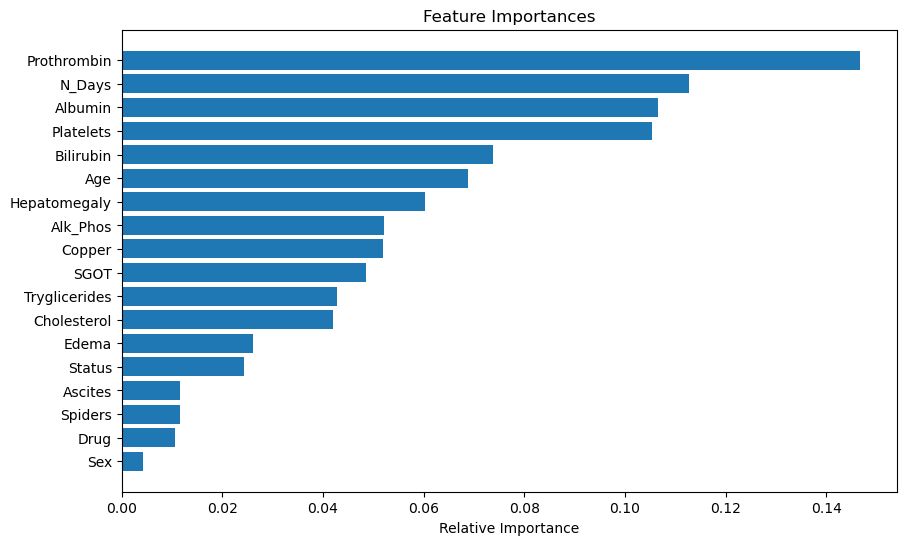

In [211]:

feature_importances = Final_model.feature_importances_

# Get feature names from DataFrame
feature_names = X_train.columns


indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Saving Model for further Detection Purpose 

In [213]:
import pickle

In [215]:
pickle.dump(Final_model, open("Liver Cirrhosis Stage Detection.pkl","wb"))

In [228]:
predictions1 = pd.DataFrame()
predictions1["platelets"] = X_test["Platelets"]
predictions1["Stage"] = preds

In [232]:
predictions1   # according to platelets

,platelets,Stage
6868,475.0,1
24016,120.0,1
9668,219.0,3
13640,165.0,3
14018,309.0,3
...,...,...
8670,203.0,2
11839,201.0,1
4013,80.0,3
21147,227.0,1
